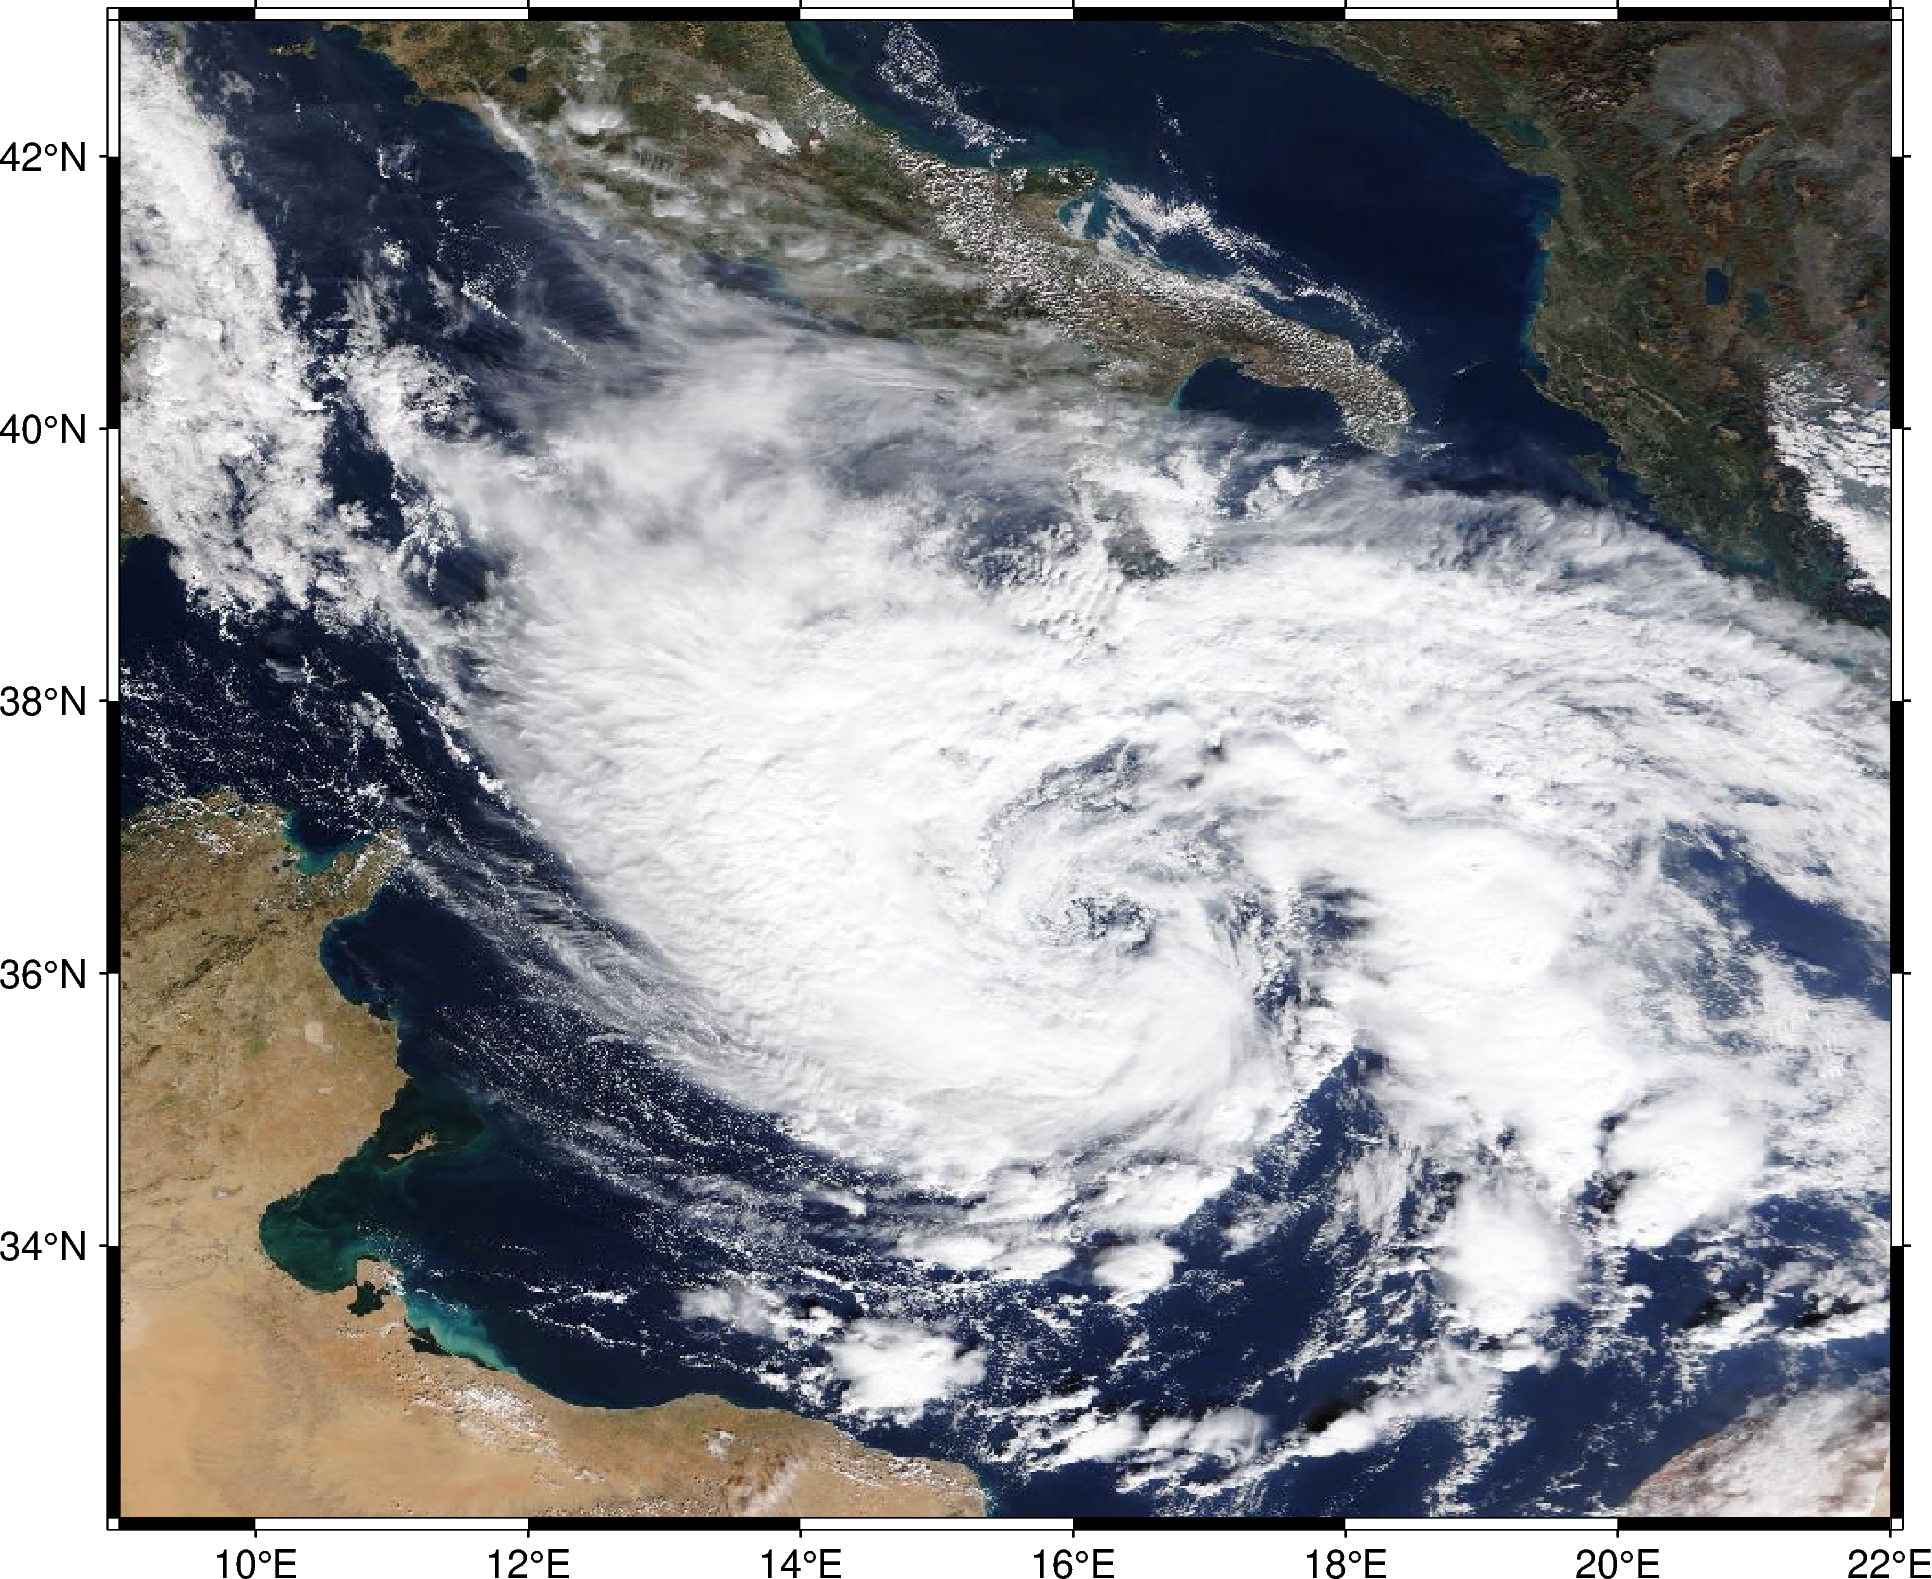

In [1]:
import pygmt
from osgeo import gdal

gdal.UseExceptions() # to suppress an annoying warning message

tiff = 'MODIS_image.tiff'
wms = "WMS:https://gibs-c.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"
ds = gdal.Open( wms )
layers = ds.GetMetadata( "SUBDATASETS" )

for value in layers.values():
    if 'MODIS_Terra_CorrectedReflectance_TrueColor' in value:
        break

time="2021-10-29"
layer = f"{value}&TIME={time}"
ds = None # close

ds = gdal.Open( layer )
Res = 1500 # meters
Res = Res / 111195 # 111195 m/degree for spherical Earth
projWin = [9, 43, 22, 32] # [ ulx, uly, lrx, lry ]
gdal.Translate( tiff, ds, projWin=projWin, xRes=Res, yRes=Res )
ds = None # close

fig = pygmt.Figure()
fig.grdimage( tiff, frame = ['WSen', 'xa', 'ya'] )
# fig.savefig("MODIS_image.png", show=True)
fig.show()

In [3]:
import pygmt
from osgeo import gdal

gdal.UseExceptions() # to suppress an annoying warning message
tiff = 'SENTINEL_image.tiff'
wms = "WMS:http://tiles.maps.eox.at/wms?"
ds = gdal.Open( wms )
layers = ds.GetMetadata( "SUBDATASETS" )
#layers.keys() to check layer names
#layers.values() to check layer URLs
layer = layers['SUBDATASET_3_NAME']
ds = None # close

ds = gdal.Open( layer )
Res = 1500 # meters
Res = Res / 111195 # 111195 m/degree for spherical Earth
projWin = [-10, 44, -5, 37] # [ ulx, uly, lrx, lry ]
gdal.Translate( tiff, ds, projWin=projWin, xRes=Res, yRes=Res )
ds = None # close

fig = pygmt.Figure()
fig.grdimage( tiff, frame = ['WSen', 'xa', 'ya'] )
# fig.savefig( "SENTINEL_image.png", show=True )

RuntimeError: WMS:http://tiles.maps.eox.at/wms?: No such file or directory